<a href="https://colab.research.google.com/github/EsraaMosaad/Practice_NLP/blob/main/assignment2_GAN_WORD2VEC_1MODEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Deep learning:
# from tensorflow.python.keras.models import Input

from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.models import Model

# from keras.models import Input, Model

from scipy import sparse

In [ ]:
text_1 =pd.read_csv('/content/TEXT_1.csv')
# text_2 =pd.read_csv('/content/nlp_txt.csv')
text_2 =pd.read_csv('/content/TEXT_2.csv')

text1 = [x for x in text_1['text']]
text2 =[x for x in text_2['text']]
print(len(text_2))
print(text_2)

3
                                                text
0  Computer programs have plenty of speed and mem...
1  Building a supervised learning algorithm that ...
2  The random forest algorithm is actually a broa...


In [ ]:
def text_preprocessing(
        text: list,
        punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
        stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', 'was', 'but', 'this', 'were', 'with', 'of', 'also',
                    'on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as']
) -> list:
    """
    A method to preproces text
    """
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x != '']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text


In [ ]:
def get_word_list(texts): # Defining the window for context
  window = 2
  # Creating a placeholder for the scanning of the word list
  word_lists = []
  all_text = []
  for text in texts:

      # Cleaning the text
      text = text_preprocessing(text)
      # print (text)

      # Appending to the all text list
      all_text += text

      # Creating a context dictionary
      for i, word in enumerate(text):
          for w in range(window):
              # Getting the context that is ahead by *window* words
              if i + 1 + w < len(text):
                  word_lists.append([word] + [text[(i + 1 + w)]])
              # Getting the context that is behind by *window* words
              if i - w - 1 >= 0:
                  word_lists.append([word] + [text[(i - w - 1)]])
  return word_lists , all_text


In [ ]:
def create_unique_word_dict(text: list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    # print("word",words)
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict

In [ ]:
word_lists_1,all_text1=get_word_list(text1)
unique_word_dict1 = create_unique_word_dict(all_text1)
word_lists_2,all_text2=get_word_list(text2)
unique_word_dict2 = create_unique_word_dict(all_text2)
unique_word_dict={}
unique_word_dict.update(unique_word_dict1)
unique_word_dict.update(unique_word_dict2)
word_lists=[]
word_lists.extend(word_lists_1)
word_lists.extend(word_lists_2)
# print(unique_word_dict1,unique_word_dict2)

# Getting all the unique words
words1 = list(unique_word_dict1.keys())
words2 = list(unique_word_dict2.keys())
print(len(words1),len(words2),len(words1)+len(words2))


56 55 111


In [ ]:
# Creating the X and Y matrices using one hot encoding
def get_X_Y(word_lists,unique_word_dict):
    n_words=len(unique_word_dict)
    print("n_words-->",n_words)
    X = []
    Y = []
    for i, word_list in tqdm(enumerate(word_lists)):
        # Getting the indices
        print("word_list-->",word_list)
        main_word_index = unique_word_dict.get(word_list[0])
        context_word_index = unique_word_dict.get(word_list[1])
        # print (word_list)
        print(word_list[0], main_word_index)
        print(word_list[1], context_word_index)

        # Creating the placeholders
        X_row = np.zeros(n_words)
        Y_row = np.zeros(n_words)

        # One hot encoding the main word
        X_row[main_word_index] = 1

        # One hot encoding the Y matrix words
        Y_row[context_word_index] = 1

        # Appending to the main matrices
        X.append(X_row)
        Y.append(Y_row)
    return X,Y


In [ ]:
# Converting the matrices into a sparse format because the vast majority of the data are 0s

x,y=get_X_Y(word_lists,unique_word_dict)

n_words--> 106


0it [00:00, ?it/s]

word_list--> ['ai', 'much']
ai 4
much 33
word_list--> ['ai', 'more']
ai 4
more 32
word_list--> ['much', 'more']
much 33
more 32
word_list--> ['much', 'ai']
much 33
ai 4
word_list--> ['much', 'about']
much 33
about 0
word_list--> ['more', 'about']
more 32
about 0
word_list--> ['more', 'much']
more 32
much 33
word_list--> ['more', 'process']
more 32
process 43
word_list--> ['more', 'ai']
more 32
ai 4
word_list--> ['about', 'process']
about 0
process 43
word_list--> ['about', 'more']
about 0
more 32
word_list--> ['about', 'capability']
about 0
capability 8
word_list--> ['about', 'much']
about 0
much 33
word_list--> ['process', 'capability']
process 43
capability 8
word_list--> ['process', 'about']
process 43
about 0
word_list--> ['process', 'superpowered']
process 43
superpowered 48
word_list--> ['process', 'more']
process 43
more 32
word_list--> ['capability', 'superpowered']
capability 8
superpowered 48
word_list--> ['capability', 'process']
capability 8
process 43
word_list--> ['capabi

154it [00:00, 683.00it/s]

['intelligence', 'to']
intelligence 28
to 50
word_list--> ['intelligence', 'artificial']
intelligence 28
artificial 5
word_list--> ['intelligence', 'more']
intelligence 28
more 32
word_list--> ['intelligence', 'use']
intelligence 28
use 55
word_list--> ['to', 'more']
to 50
more 32
word_list--> ['to', 'intelligence']
to 50
intelligence 28
word_list--> ['to', 'efficiently']
to 50
efficiently 19
word_list--> ['to', 'artificial']
to 50
artificial 5
word_list--> ['more', 'efficiently']
more 32
efficiently 19
word_list--> ['more', 'to']
more 32
to 50
word_list--> ['more', 'perform']
more 32
perform 40
word_list--> ['more', 'intelligence']
more 32
intelligence 28
word_list--> ['efficiently', 'perform']
efficiently 19
perform 40
word_list--> ['efficiently', 'more']
efficiently 19
more 32
word_list--> ['efficiently', 'tasks']
efficiently 19
tasks 49
word_list--> ['efficiently', 'to']
efficiently 19
to 50
word_list--> ['perform', 'tasks']
perform 40
tasks 49
word_list--> ['perform', 'efficiently

223it [00:00, 491.71it/s]


word_list--> ['developers', 'have']
developers 17
have 24
word_list--> ['should', 'have']
should 45
have 24
word_list--> ['should', 'developers']
should 45
developers 17
word_list--> ['should', 'background']
should 45
background 6
word_list--> ['have', 'background']
have 24
background 6
word_list--> ['have', 'should']
have 24
should 45
word_list--> ['have', 'mathematics']
have 24
mathematics 31
word_list--> ['have', 'developers']
have 24
developers 17
word_list--> ['background', 'mathematics']
background 6
mathematics 31
word_list--> ['background', 'have']
background 6
have 24
word_list--> ['background', 'feel']
background 6
feel 20
word_list--> ['background', 'should']
background 6
should 45
word_list--> ['mathematics', 'feel']
mathematics 31
feel 20
word_list--> ['mathematics', 'background']
mathematics 31
background 6
word_list--> ['mathematics', 'comfortable']
mathematics 31
comfortable 11
word_list--> ['mathematics', 'have']
mathematics 31
have 24
word_list--> ['feel', 'comfortab

310it [00:00, 351.05it/s]

35
word_list--> ['speed', 'their']
speed 43
their 49
word_list--> ['speed', 'have']
speed 43
have 24
word_list--> ['memory', 'their']
memory 29
their 49
word_list--> ['memory', 'speed']
memory 29
speed 43
word_list--> ['memory', 'abilities']
memory 29
abilities 0
word_list--> ['memory', 'plenty']
memory 29
plenty 35
word_list--> ['their', 'abilities']
their 49
abilities 0
word_list--> ['their', 'memory']
their 49
memory 29
word_list--> ['their', 'correspond']
their 49
correspond 11
word_list--> ['their', 'speed']
their 49
speed 43
word_list--> ['abilities', 'correspond']
abilities 0
correspond 11
word_list--> ['abilities', 'their']
abilities 0
their 49
word_list--> ['abilities', 'to']
abilities 0
to 50
word_list--> ['abilities', 'memory']
abilities 0
memory 29
word_list--> ['correspond', 'to']
correspond 11
to 50
word_list--> ['correspond', 'abilities']
correspond 11
abilities 0
word_list--> ['correspond', 'intellectual']
correspond 11
intellectual 25
word_list--> ['correspond', 'their

412it [00:01, 393.98it/s]

works 54
team 46
word_list--> ['works', 'that']
works 54
that 48
word_list--> ['takes', 'team']
takes 45
team 46
word_list--> ['takes', 'works']
takes 45
works 54
word_list--> ['takes', 'dedicated']
takes 45
dedicated 15
word_list--> ['takes', 'actually']
takes 45
actually 2
word_list--> ['team', 'dedicated']
team 46
dedicated 15
word_list--> ['team', 'takes']
team 46
takes 45
word_list--> ['team', 'experts']
team 46
experts 22
word_list--> ['team', 'works']
team 46
works 54
word_list--> ['dedicated', 'experts']
dedicated 15
experts 22
word_list--> ['dedicated', 'team']
dedicated 15
team 46
word_list--> ['dedicated', 'to']
dedicated 15
to 50
word_list--> ['dedicated', 'takes']
dedicated 15
takes 45
word_list--> ['experts', 'to']
experts 22
to 50
word_list--> ['experts', 'dedicated']
experts 22
dedicated 15
word_list--> ['experts', 'evaluate']
experts 22
evaluate 21
word_list--> ['experts', 'team']
experts 22
team 46
word_list--> ['to', 'evaluate']
to 50
evaluate 21
word_list--> ['to', 

494it [00:01, 408.92it/s]

catch 8
word_list--> ['original', 'accuracy']
original 34
accuracy 1
word_list--> ['data', 'catch']
data 13
catch 8
word_list--> ['data', 'original']
data 13
original 34
word_list--> ['data', 'errors']
data 13
errors 20
word_list--> ['data', 'against']
data 13
against 3
word_list--> ['catch', 'errors']
catch 8
errors 20
word_list--> ['catch', 'data']
catch 8
data 13
word_list--> ['catch', 'ai']
catch 8
ai 4
word_list--> ['catch', 'original']
catch 8
original 34
word_list--> ['errors', 'ai']
errors 20
ai 4
word_list--> ['errors', 'catch']
errors 20
catch 8
word_list--> ['errors', 'data']
errors 20
data 13
word_list--> ['ai', 'errors']
ai 4
errors 20
word_list--> ['ai', 'catch']
ai 4
catch 8
word_list--> ['random', 'forest']
random 39
forest 23
word_list--> ['random', 'algorithm']
random 39
algorithm 5
word_list--> ['forest', 'algorithm']
forest 23
algorithm 5
word_list--> ['forest', 'random']
forest 23
random 39
word_list--> ['forest', 'actually']
forest 23
actually 2
word_list--> ['alg

In [ ]:
import tensorflow as tf

XX = tf.convert_to_tensor(x, dtype=tf.float32)
YY = tf.convert_to_tensor(y, dtype=tf.float32)
# XX2 = tf.convert_to_tensor(x2, dtype=tf.float32)
# YY2 = tf.convert_to_tensor(y2, dtype=tf.float32)
print("x",XX.shape,XX.shape)
# print("y",YY1.shape,YY2.shape)

x (494, 106) (494, 106)


In [ ]:
def CreateModel(XX,YY):
    # Defining the size of the embedding
    embed_size = 2
    # Defining the neural network

    # inp = Input(shape=(X.shape[1],))
    inp = Input(shape=XX.shape[1]) 
    x = Dense(units=embed_size, activation='linear')(inp)
    # x = Dense(units=21, activation='softmax')(x)
    x = Dense(units=YY.shape[1], activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.summary()
    return model

In [ ]:
model = CreateModel(XX,YY)
# Optimizing the network weights
model.fit(
    x=XX,
    y=YY,
    batch_size=10,
    epochs=628
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 106)]             0         
                                                                 
 dense (Dense)               (None, 2)                 214       
                                                                 
 dense_1 (Dense)             (None, 106)               318       
                                                                 
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________
Epoch 1/628
50/50 [==============================] - 1s 3ms/step - loss: 4.6513
Epoch 2/628
50/50 [==============================] - 0s 3ms/step - loss: 4.6184
Epoch 3/628
50/50 [==============================] - 0s 3ms/step - loss: 4.5846
Epoch 4/628
50/50 [==============================] - 0s 2ms/step - loss: 4.5455
Epoch 5

In [ ]:

weights= model.get_weights()[0] 

print(weights.shape)
print(weights[1][1])
print(weights[0])

(106, 2)
1.8955393
[-1.9243424   0.21481343]


In [ ]:
#get the weight for each unique word
def get_embedding_word(words,weights,unique_word_dict):
  embedding_dict = {}
  for word in words: #to pick the a row of weight of two values for each unique word since weights = 21*2
      embedding_dict.update({
          word: weights[unique_word_dict.get(word)]
      })

  return embedding_dict

In [ ]:
embedding_dict_1=get_embedding_word(words1,weights,unique_word_dict1)
embedding_dict_2=get_embedding_word(words2,weights,unique_word_dict2)

In [ ]:
print(len(embedding_dict_1),len(words1))
print(len(embedding_dict_2),len(words2))

56 56
55 55


0  >>  about
1  >>  ai
2  >>  algorithms
3  >>  analysis
4  >>  applications
5  >>  artificial
6  >>  background
7  >>  become
8  >>  capability
9  >>  catchall
10  >>  chess
11  >>  comfortable
12  >>  communicating
13  >>  complex
14  >>  connect
15  >>  customers
16  >>  data
17  >>  developers
18  >>  done
19  >>  efficiently
20  >>  feel
21  >>  format
22  >>  function
23  >>  has
24  >>  have
25  >>  human
26  >>  identify
27  >>  input
28  >>  intelligence
29  >>  it
30  >>  manually
31  >>  mathematics
32  >>  more
33  >>  much
34  >>  once
35  >>  online
36  >>  or
37  >>  otherwise
38  >>  particular
39  >>  patterns
40  >>  perform
41  >>  playing
42  >>  problems
43  >>  process
44  >>  required
45  >>  should
46  >>  solve
47  >>  such
48  >>  superpowered
49  >>  tasks
50  >>  term
51  >>  than
52  >>  that
53  >>  thinking
54  >>  to
55  >>  use
0  >>  abilities
1  >>  accuracy
2  >>  actually
3  >>  against
4  >>  ai
5  >>  algorithm
6  >>  broad
7  >>  building
8  >>  

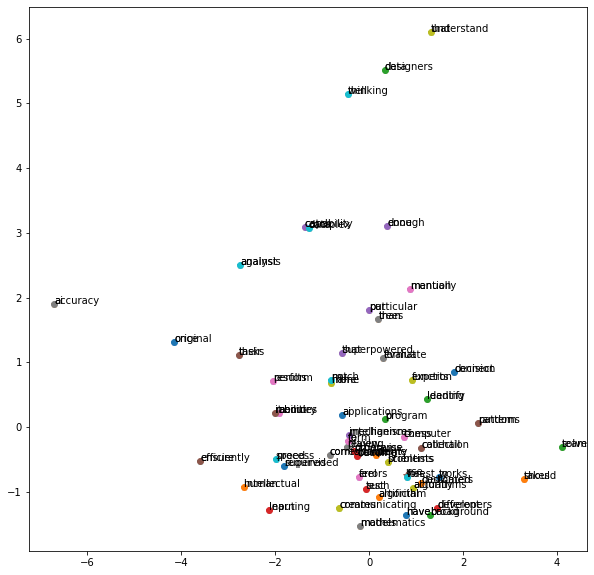

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict1.keys()):
    print(i, ' >> ', word)
    coord = embedding_dict_1.get(word)
    plt.scatter(coord[0], coord[1],marker="*")
    plt.annotate(word, (coord[0], coord[1]))
    i = i + 1
i=0
for word in list(unique_word_dict2.keys()):
    print(i, ' >> ', word)
    coord = embedding_dict_2.get(word)
    plt.scatter(coord[0], coord[1],marker="o")
    plt.annotate(word, (coord[0], coord[1]))
    i = i + 1

In [ ]:
def cosine_sim( vecA, vecB):
        """Find the cosine similarity distance between two vectors."""
        csim = np.dot(vecA, vecB) / (np.linalg.norm(vecA) * np.linalg.norm(vecB))
        if np.isnan(np.sum(csim)):
            return 0
        return csim

In [ ]:
def cal_center(unique_word_dict,embedding_dict):
  sumx=0.0
  sumy=0.0
  for word in list(unique_word_dict.keys()):

      coord = embedding_dict.get(word)
      sumx +=coord[0]
      sumy +=coord[1]
  center=(sumx/len(unique_word_dict),sumy/len(unique_word_dict))
  return center



center1=cal_center(unique_word_dict1,embedding_dict_1)
center2=cal_center(unique_word_dict2,embedding_dict_2)
center1

(-0.2783659175506078, 0.42374854707824333)

In [ ]:
cosine_sim( center1, center2)

0.9999660897041208